In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD,RMSprop

In [2]:
picture_size=48
folder_path='C:/project-python/yolo-scratch/fer-dataset/'

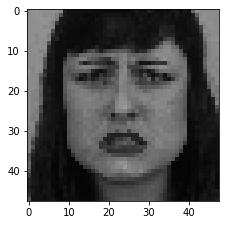

In [3]:
expression='angry'

plt.figure(figsize=(12,12))
for i in range(1,10,1):
    plt.subplot(3,3,1)
    img=load_img(folder_path+"train/"+expression+"/"+os.listdir(folder_path+"train/"+expression)[i], target_size=(picture_size,picture_size))
    plt.imshow(img)
plt.show()

In [4]:
batch_size=128
datagen_train=ImageDataGenerator()
datagen_vale=ImageDataGenerator()

train_set=datagen_train.flow_from_directory(folder_path+"train/", target_size=(picture_size,picture_size), color_mode='grayscale', batch_size=batch_size, class_mode='categorical', shuffle=True)
test_set=datagen_train.flow_from_directory(folder_path+"validation/", target_size=(picture_size,picture_size), color_mode='grayscale', batch_size=batch_size, class_mode='categorical', shuffle=True)

no_of_classes=7
model= Sequential()

Found 95236 images belonging to 7 classes.
Found 10678 images belonging to 7 classes.


In [5]:
#1st CNN layer
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

#2nd CNN layer
model.add(Conv2D(128, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

#3rd CNN layer
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

#4th CNN layer
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

#5th CNN layer
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))



#Flatten
model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Fully connected 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

In [7]:
opt=Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

C:\Users\sures\AppData\Local\Temp/ipykernel_1235108/1154190337.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_set, steps_per_epoch=train_set.n//train_set.batch_size, epochs=epochs, validation_data=test_set, validation_steps=test_set.n//test_set.batch_size, callbacks=callbacks_list)


Epoch 1/48
744/744 [==============================] - ETA: 0s - loss: 2.0057 - accuracy: 0.2294
Epoch 1: val_accuracy improved from -inf to 0.29669, saving model to model\model_4Mar.h5
744/744 [==============================] - 1564s 2s/step - loss: 2.0057 - accuracy: 0.2294 - val_loss: 1.7871 - val_accuracy: 0.2967 - lr: 1.0000e-04
Epoch 2/48
744/744 [==============================] - ETA: 0s - loss: 1.7425 - accuracy: 0.3338
Epoch 2: val_accuracy improved from 0.29669 to 0.36154, saving model to model\model_4Mar.h5
744/744 [==============================] - 1316s 2s/step - loss: 1.7425 - accuracy: 0.3338 - val_loss: 1.7394 - val_accuracy: 0.3615 - lr: 1.0000e-04
Epoch 3/48
744/744 [==============================] - ETA: 0s - loss: 1.5716 - accuracy: 0.3977
Epoch 3: val_accuracy improved from 0.36154 to 0.43176, saving model to model\model_4Mar.h5
744/744 [==============================] - 1322s 2s/step - loss: 1.5716 - accuracy: 0.3977 - val_loss: 1.4893 - val_accuracy: 0.4318 - lr: 

Epoch 26/48
744/744 [==============================] - ETA: 0s - loss: 0.7843 - accuracy: 0.7123
Epoch 26: val_accuracy did not improve from 0.68242
744/744 [==============================] - 1301s 2s/step - loss: 0.7843 - accuracy: 0.7123 - val_loss: 0.9203 - val_accuracy: 0.6818 - lr: 1.0000e-04
Epoch 27/48
744/744 [==============================] - ETA: 0s - loss: 0.7613 - accuracy: 0.7196
Epoch 27: val_accuracy improved from 0.68242 to 0.68355, saving model to model\model_4Mar.h5
744/744 [==============================] - 1313s 2s/step - loss: 0.7613 - accuracy: 0.7196 - val_loss: 0.9304 - val_accuracy: 0.6835 - lr: 1.0000e-04
Epoch 28/48
744/744 [==============================] - ETA: 0s - loss: 0.7372 - accuracy: 0.7297
Epoch 28: val_accuracy did not improve from 0.68355
744/744 [==============================] - 1310s 2s/step - loss: 0.7372 - accuracy: 0.7297 - val_loss: 0.9188 - val_accuracy: 0.6804 - lr: 1.0000e-04
Epoch 29/48
744/744 [==============================] - ETA: 0s

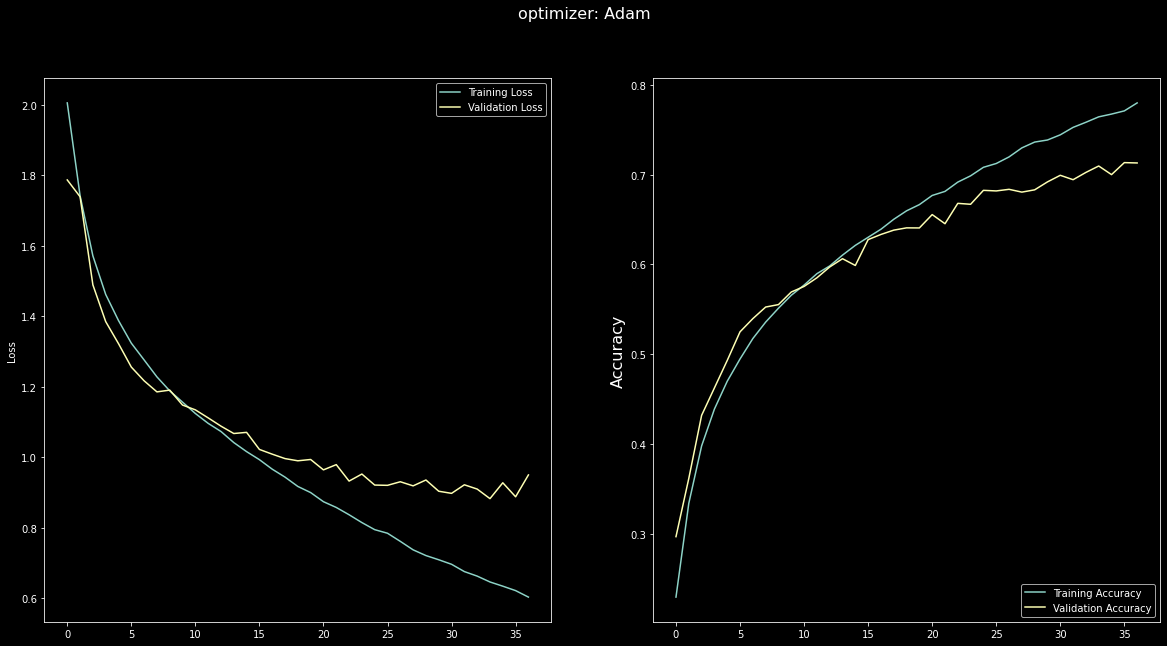

<Figure size 432x288 with 0 Axes>

In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint=ModelCheckpoint('model/model_4Mar.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping=EarlyStopping(monitor='val_loss', min_delta=0,patience=3, verbose=1, restore_best_weights=True)
reduce_learningrate=ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_delta=0.0001)
callbacks_list=[early_stopping,checkpoint,reduce_learningrate]
epochs=48

history=model.fit_generator(generator=train_set, steps_per_epoch=train_set.n//train_set.batch_size, epochs=epochs, validation_data=test_set, validation_steps=test_set.n//test_set.batch_size, callbacks=callbacks_list)


plt.style.use('dark_background')
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('optimizer: Adam', fontsize=16)
plt.ylabel('Loss', fontsize=10)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.savefig('model_accuracy.png')


In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('optimizer: Adam', fontsize=16)
plt.ylabel('Loss', fontsize=10)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.savefig('model_accuracy.png')